In [1]:
import glob
import os

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = r"./result/"
all_files = glob.glob(os.path.join(path, "*.csv"))
dtypes = {
    "batch_size": int,
    "context_length": int,
    "prediction_length": int,
    "time": float,
    "throughput": float,
    "compiled": bool,
}
df = pd.concat((pd.read_csv(f, dtype=dtypes) for f in all_files), ignore_index=True)

df["time"] = df["time"].round(3)
df["throughput"] = df["throughput"].round(1)
df = df.sort_values(by=["model", "backend", "device", "compiled", "hardware"])
df.head(2)

,date,model,backend,device,compiled,hardware,batch_size,context_length,prediction_length,time,throughput
18,2025-11-10,NX-AI/TiRex,cuda,cuda,False,H100,1,2048,32,0.017,56.6
19,2025-11-10,NX-AI/TiRex,cuda,cuda,False,H100,1,2048,64,0.033,29.6


In [3]:
def plot_by_metric(df, col, post_title=""):
    fig, ax = plt.subplots(figsize=(8, 5))

    x_ticks = sorted(df[col].unique())
    ax.set_xscale("log")
    ax.set_xticks(x_ticks, labels=map(str, x_ticks))
    ax.xaxis.set_minor_locator(plt.FixedLocator(x_ticks))

    grouping_cols = df.columns.drop([col, "time", "throughput"]).tolist()
    for name, group in df.groupby(grouping_cols):
        label = f"{name[2]}/{name[3]}{'' if name[4] else '-uncompiled'} ({name[5]})"
        ax.plot(group[col], group["throughput"], label=label, marker="o", linestyle="-")

    ax.grid(True, which="both", ls="--", alpha=0.5)
    ax.legend(title="Configuration Backend/Device, (Hardware)")

    col_name = col.replace("_", " ").title()
    ax.set_xlabel(f"{col_name} (Log Scale)", fontsize=10)
    ax.set_ylabel("Throughput (Tokens/s)", fontsize=10)
    ax.set_title(f"Throughput vs. {col_name} {post_title}", fontsize=12)

    fig.tight_layout()
    return fig, ax

In [4]:
df_select_batch_size = df[(df["prediction_length"] == 32) & (df["context_length"] == 2048)]
df_select_batch_size

,date,model,backend,device,compiled,hardware,batch_size,context_length,prediction_length,time,throughput
18,2025-11-10,NX-AI/TiRex,cuda,cuda,False,H100,1,2048,32,0.017,56.6
21,2025-11-10,NX-AI/TiRex,cuda,cuda,False,H100,16,2048,32,0.017,894.1
24,2025-11-10,NX-AI/TiRex,cuda,cuda,False,H100,256,2048,32,0.048,5317.6
36,2025-11-10,NX-AI/TiRex,torch,cpu,False,H100,1,2048,32,0.172,5.8
39,2025-11-10,NX-AI/TiRex,torch,cpu,False,H100,16,2048,32,0.514,31.1
42,2025-11-10,NX-AI/TiRex,torch,cpu,False,H100,256,2048,32,5.948,43.0
45,2025-11-10,NX-AI/TiRex,torch,cpu,False,macbook,1,2048,32,0.165,6.1
48,2025-11-10,NX-AI/TiRex,torch,cpu,False,macbook,16,2048,32,1.875,8.5
51,2025-11-10,NX-AI/TiRex,torch,cpu,False,macbook,256,2048,32,24.243,10.6
27,2025-11-10,NX-AI/TiRex,torch,cpu,True,H100,1,2048,32,0.036,27.4


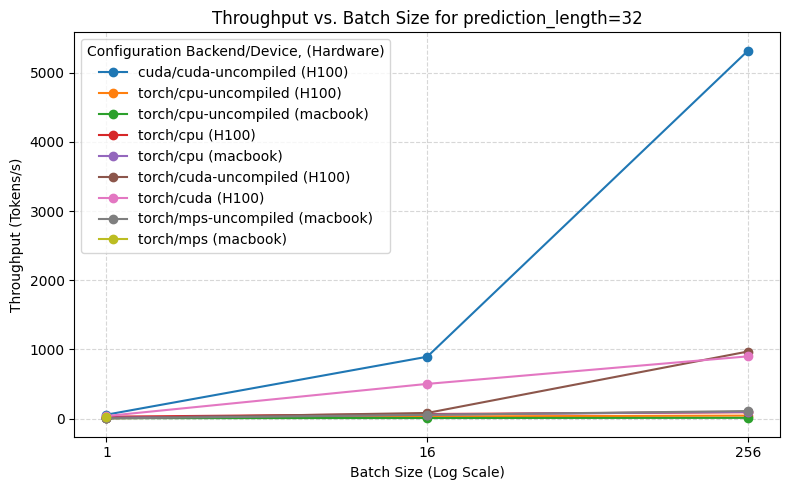

In [5]:
plot_by_metric(df_select_batch_size, "batch_size", post_title="for prediction_length=32")
plt.show()

In [6]:
df_select_pred_length = df[(df["batch_size"] == 16) & (df["context_length"] == 2048)]
df_select_pred_length

,date,model,backend,device,compiled,hardware,batch_size,context_length,prediction_length,time,throughput
21,2025-11-10,NX-AI/TiRex,cuda,cuda,False,H100,16,2048,32,0.017,894.1
22,2025-11-10,NX-AI/TiRex,cuda,cuda,False,H100,16,2048,64,0.033,476.2
23,2025-11-10,NX-AI/TiRex,cuda,cuda,False,H100,16,2048,128,0.065,244.3
39,2025-11-10,NX-AI/TiRex,torch,cpu,False,H100,16,2048,32,0.514,31.1
40,2025-11-10,NX-AI/TiRex,torch,cpu,False,H100,16,2048,64,1.024,15.6
41,2025-11-10,NX-AI/TiRex,torch,cpu,False,H100,16,2048,128,2.058,7.8
48,2025-11-10,NX-AI/TiRex,torch,cpu,False,macbook,16,2048,32,1.875,8.5
49,2025-11-10,NX-AI/TiRex,torch,cpu,False,macbook,16,2048,64,3.711,4.3
50,2025-11-10,NX-AI/TiRex,torch,cpu,False,macbook,16,2048,128,7.486,2.1
30,2025-11-10,NX-AI/TiRex,torch,cpu,True,H100,16,2048,32,0.242,66.0


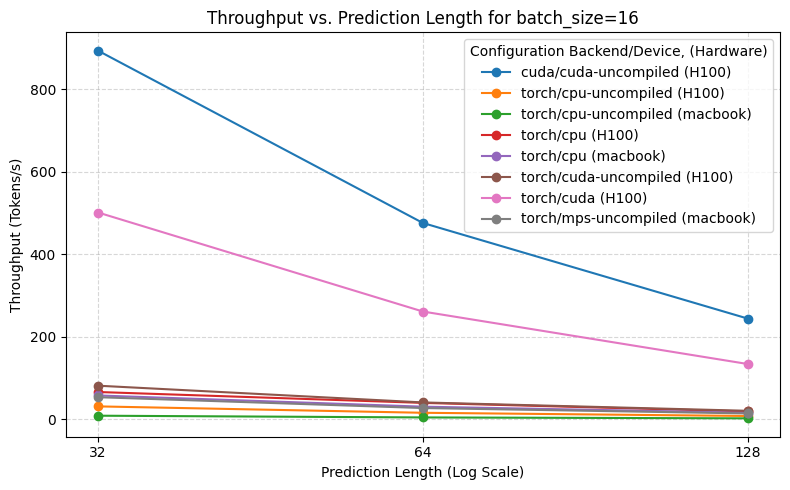

In [7]:
plot_by_metric(df_select_pred_length, "prediction_length", post_title="for batch_size=16")
plt.show()

In [8]:
df_select_context_length = df[(df["prediction_length"] == 32) & (df["batch_size"] == 16)]
df_select_context_length

,date,model,backend,device,compiled,hardware,batch_size,context_length,prediction_length,time,throughput
21,2025-11-10,NX-AI/TiRex,cuda,cuda,False,H100,16,2048,32,0.017,894.1
39,2025-11-10,NX-AI/TiRex,torch,cpu,False,H100,16,2048,32,0.514,31.1
48,2025-11-10,NX-AI/TiRex,torch,cpu,False,macbook,16,2048,32,1.875,8.5
30,2025-11-10,NX-AI/TiRex,torch,cpu,True,H100,16,2048,32,0.242,66.0
12,2025-11-10,NX-AI/TiRex,torch,cpu,True,macbook,16,2048,32,0.277,57.6
60,2025-11-10,NX-AI/TiRex,torch,cuda,False,H100,16,2048,32,0.196,81.3
3,2025-11-10,NX-AI/TiRex,torch,cuda,True,H100,16,2048,32,0.031,501.5
69,2025-11-10,NX-AI/TiRex,torch,mps,False,macbook,16,2048,32,0.299,53.4


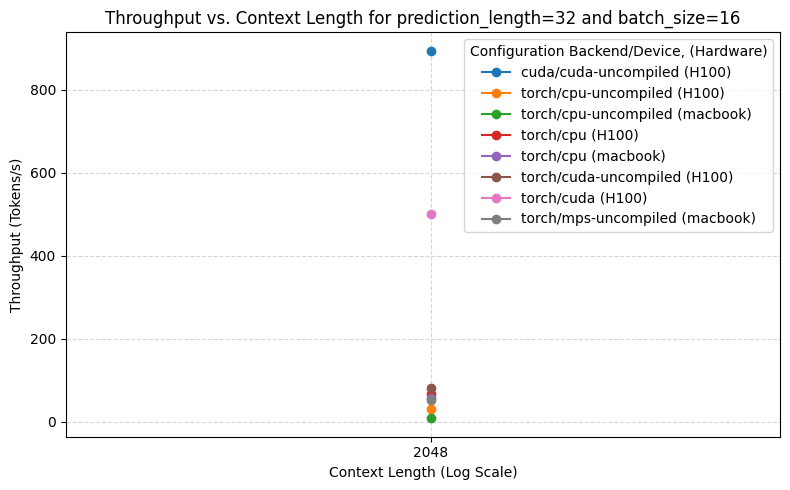

In [9]:
plot_by_metric(df_select_context_length, "context_length", post_title="for prediction_length=32 and batch_size=16")
plt.show()